# Non-Linear SVM Classification

In [1]:
from sklearn.datasets import make_moons
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.svm import LinearSVC, SVC
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from itertools import product

## Adding higher-degree features

We train a SVC on a toy dataset (two interleaving half circles) and scale its features to higher degrees as additional features.

### Load the data

We use the petal length and width as features and classify iris virginica.

In [28]:
X, y = make_moons(n_samples=100, noise=0.14)

### Plot the data

In [29]:
x_circ_1 = []
y_circ_1 = []
x_circ_2 = []
y_circ_2 = []
for i in range(len(y)):
    if y[i] == 0:
        x_circ_1.append(X[i][0])
        y_circ_1.append(X[i][1])
    else:
        x_circ_2.append(X[i][0])
        y_circ_2.append(X[i][1])

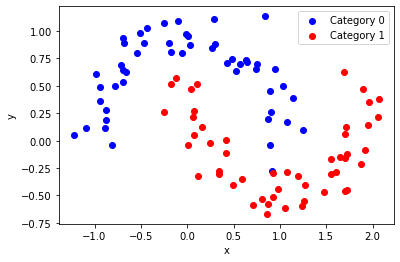

In [30]:
plt.scatter(x_circ_1, y_circ_1, c='b', label='Category 0')
plt.scatter(x_circ_2, y_circ_2, c='r', label='Category 1')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.show()

### Scale and train the model

In [48]:
svm_clf = Pipeline([
    ('poly_features', PolynomialFeatures(degree=3)),
    ('scaler', StandardScaler()),
    ('svm_clf', LinearSVC(C=15, loss='hinge', max_iter=10000))
])
svm_clf.fit(X, y)

Pipeline(steps=[('poly_features', PolynomialFeatures(degree=3)),
                ('scaler', StandardScaler()),
                ('svm_clf', LinearSVC(C=15, loss='hinge', max_iter=10000))])

### Make a prediction

In [49]:
svm_clf.predict([[1.0, 0.75]])

array([0], dtype=int64)

In [50]:
svm_clf.predict([[0.1, -0.1]])

array([1], dtype=int64)

### Plot the decision regions

In [51]:
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

Z = svm_clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

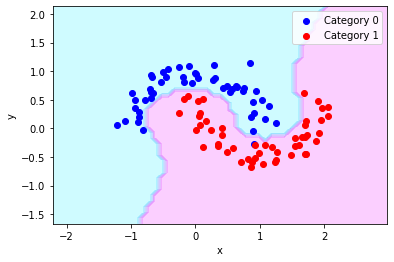

In [52]:
plt.clf()
cmap = plt.get_cmap('cool')
plt.contourf(xx, yy, Z, alpha=0.2, cmap=cmap)
plt.scatter(x_circ_1, y_circ_1, c='b', label='Category 0')
plt.scatter(x_circ_2, y_circ_2, c='r', label='Category 1')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

## Polynomial kernel

### Low-degree polynomial kernel

In [41]:
poly_kernel_svm_clf = Pipeline([
    ('scaler', StandardScaler()),
    ('svm_clf', SVC(kernel='poly', degree=3, coef0=1, C=5))
])
poly_kernel_svm_clf.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=5, coef0=1, kernel='poly'))])

In [42]:
Z = poly_kernel_svm_clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

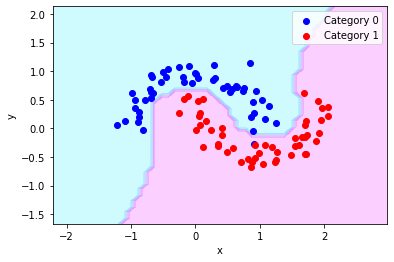

In [43]:
plt.clf()
cmap = plt.get_cmap('cool')
plt.contourf(xx, yy, Z, alpha=0.2, cmap=cmap)
plt.scatter(x_circ_1, y_circ_1, c='b', label='Category 0')
plt.scatter(x_circ_2, y_circ_2, c='r', label='Category 1')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

The low-degree polynomial model is enough to fit the data well and it still seems to generalize in a good way.

### High-degree polynomial kernel

In [65]:
poly_kernel_svm_clf = Pipeline([
    ('scaler', StandardScaler()),
    ('svm_clf', SVC(kernel='poly', degree=13, coef0=10, C=5))
])
poly_kernel_svm_clf.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=5, coef0=10, degree=13, kernel='poly'))])

In [66]:
Z = poly_kernel_svm_clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

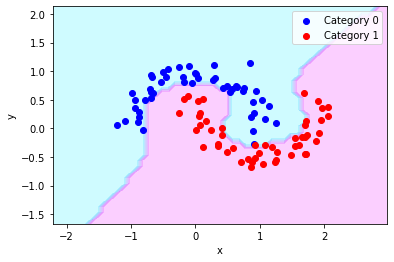

In [67]:
plt.clf()
cmap = plt.get_cmap('cool')
plt.contourf(xx, yy, Z, alpha=0.2, cmap=cmap)
plt.scatter(x_circ_1, y_circ_1, c='b', label='Category 0')
plt.scatter(x_circ_2, y_circ_2, c='r', label='Category 1')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

## Gaussian RBF kernel

In [87]:
ZZ = []
hyperparams = [
    [0.1, 0.001],
    [0.1, 1000],
    [5, 0.001],
    [5, 1000]
]

for hyp in hyperparams:
    rbf_kernel_svm_clf = Pipeline([
        ('scaler', StandardScaler()),
        ('svm_clf', SVC(kernel='rbf', gamma=hyp[0], C=hyp[1]))
    ])
    rbf_kernel_svm_clf.fit(X, y)

    Z = rbf_kernel_svm_clf.predict(np.c_[xx.ravel(), yy.ravel()])
    ZZ.append(Z.reshape(xx.shape))

<Figure size 432x288 with 0 Axes>

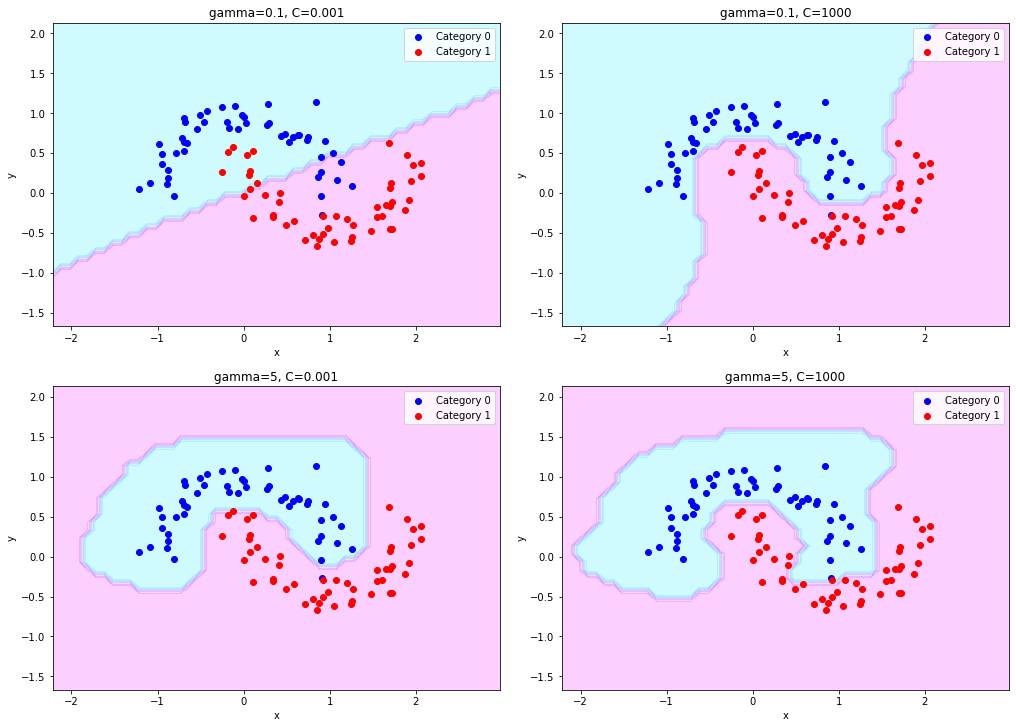

In [90]:
plt.clf()
cmap = plt.get_cmap('cool')
axs = plt.figure(figsize=(14, 10), constrained_layout=True).subplots(2, 2)
i = 0
for ax in axs.flat:
    ax.contourf(xx, yy, ZZ[i], alpha=0.2, cmap=cmap)
    ax.scatter(x_circ_1, y_circ_1, c='b', label='Category 0')
    ax.scatter(x_circ_2, y_circ_2, c='r', label='Category 1')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_title('gamma={}, C={}'.format(hyperparams[i][0], hyperparams[i][1]))
    ax.legend()
    i += 1
plt.show()